In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
exp_1 = pd.read_csv('5_task_1.csv',delimiter = ',')

In [14]:
exp_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [26]:
a = exp_1.query('group =="A"').events
b = exp_1.query('group =="B"').events
c = exp_1.query('group =="C"').events

In [27]:
a

0       14
1       41
2       30
3       37
4       38
        ..
9995    25
9996    25
9997    30
9998    21
9999    21
Name: events, Length: 10000, dtype: int64

In [28]:
stats.levene(a,b,c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.10413271995240937)

In [30]:
stats.shapiro(a.sample(1000,random_state = 17))

ShapiroResult(statistic=0.9973138685756311, pvalue=0.09586645503400866)

In [32]:
stats.shapiro(b.sample(1000,random_state = 17))

ShapiroResult(statistic=0.9980819475724109, pvalue=0.3186658905454146)

In [33]:
stats.shapiro(c.sample(1000,random_state = 17))

ShapiroResult(statistic=0.9981201274607922, pvalue=0.3366435414670874)

In [34]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [35]:
round(stats.f_oneway(a,b,c)[0])

2886

In [37]:
print(pairwise_tukeyhsd(exp_1['events'],groups = exp_1['group']).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034   0.0   7.7038  8.3642   True
     A      C  -2.1093   0.0  -2.4395 -1.7791   True
     B      C -10.1433   0.0 -10.4735 -9.8131   True
----------------------------------------------------


Text(0, 0.5, 'Число покупок')

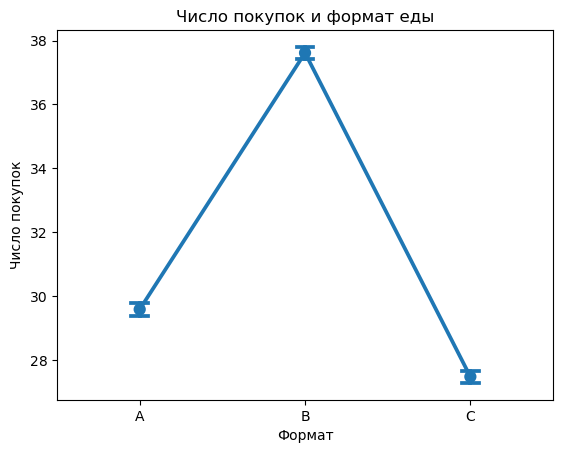

In [38]:
sns.pointplot(x = 'group', y = 'events', data =  exp_1, capsize = .1)
plt.title('Число покупок и формат еды')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

In [39]:
exp_2 = pd.read_csv('5_task_2.csv', delimiter = ',')

In [40]:
exp_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


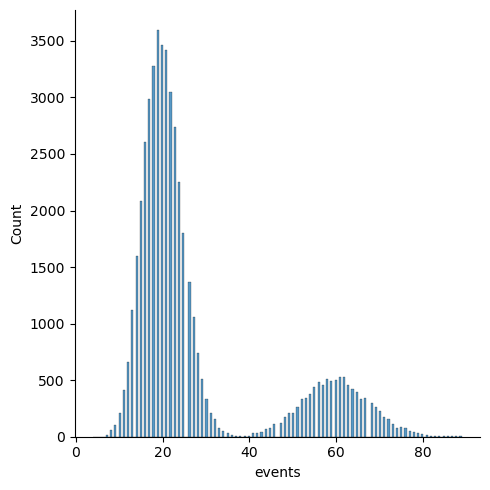

In [43]:
sns.displot(exp_2.query('group =="control"').events)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


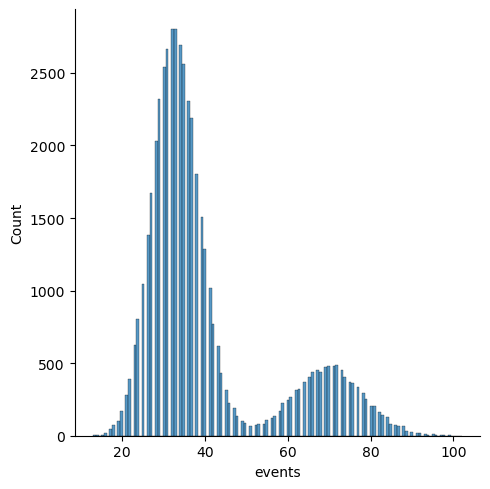

In [48]:
sns.displot(exp_2.query('group =="test"').events)

In [54]:
exp_2.groupby(['group','segment']).events.describe().T.round(2)


group     control                test          
segment      high       low      high       low
count    10000.00  40000.00  10000.00  40000.00
mean        59.97     20.03     69.94     33.03
std          7.81      4.47      8.40      5.72
min         31.00      4.00     40.00     13.00
25%         55.00     17.00     64.00     29.00
50%         60.00     20.00     70.00     33.00
75%         65.00     23.00     76.00     37.00
max         89.00     41.00    102.00     59.00

In [55]:
model = smf.ols(formula = 'events ~ segment+group +segment:group', data = exp_2).fit()
aov_table = anova_lm(model, typ=2)

In [56]:
print(round(aov_table, 2))

                    sum_sq       df          F  PR(>F)
segment        23624796.65      1.0  689756.38     0.0
group           3837195.41      1.0  112031.86     0.0
segment:group     36642.44      1.0    1069.82     0.0
Residual        3424955.89  99996.0        NaN     NaN


In [57]:
exp_2['combination'] = exp_2.group + ' \ '+ exp_2.segment

In [58]:
exp_2

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [63]:
print(pairwise_tukeyhsd(exp_2['events'],groups = exp_2['combination']).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392   0.0 -40.1073 -39.7711   True
control \ high   test \ high   9.9677   0.0   9.7551  10.1803   True
control \ high    test \ low -26.9449   0.0  -27.113 -26.7768   True
 control \ low   test \ high  49.9069   0.0  49.7388   50.075   True
 control \ low    test \ low  12.9944   0.0   12.888  13.1007   True
   test \ high    test \ low -36.9126   0.0 -37.0807 -36.7445   True
--------------------------------------------------------------------


Text(0, 0.5, 'Число покупок')

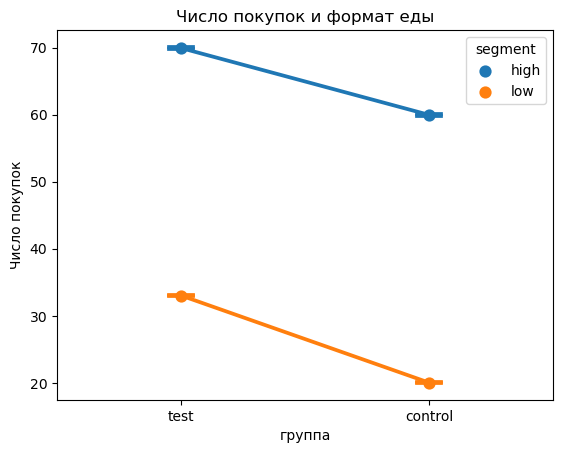

In [66]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data =  exp_2, capsize = .1)
plt.title('Число покупок и формат еды')
plt.xlabel('группа')
plt.ylabel('Число покупок')

Text(0, 0.5, 'Число покупок')

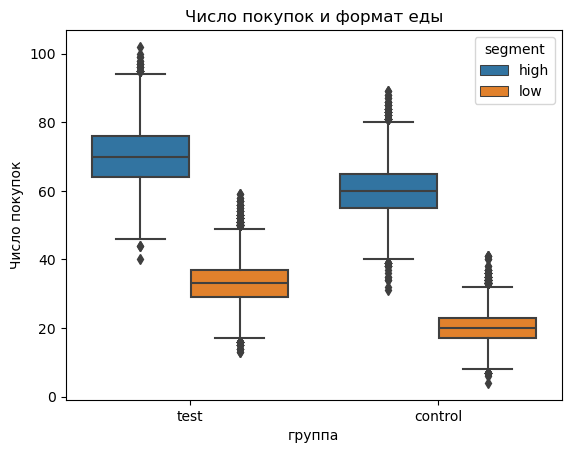

In [68]:
sns.boxplot(x = 'group', y = 'events', hue = 'segment', data =  exp_2)
plt.title('Число покупок и формат еды')
plt.xlabel('группа')
plt.ylabel('Число покупок')

Text(0, 0.5, 'Число покупок')

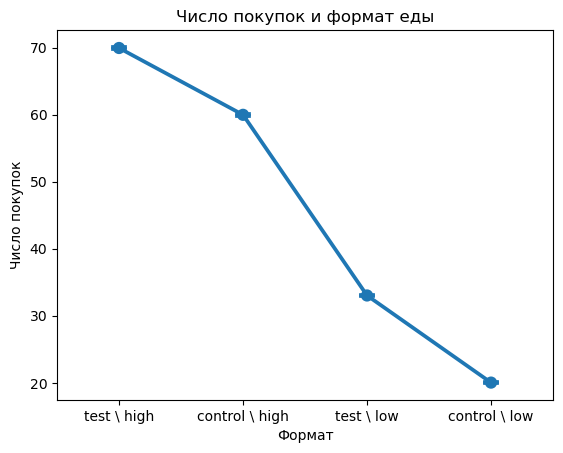

In [64]:
sns.pointplot(x = 'combination', y = 'events', data =  exp_2, capsize = .1)
plt.title('Число покупок и формат еды')
plt.xlabel('Формат')
plt.ylabel('Число покупок')